<a href="https://colab.research.google.com/github/Lutris98/21_1Q/blob/master/3.Bike/Bike_Upgrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.EDA

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [235]:
from google.colab import drive
from datetime import datetime #not just import datetime
drive.mount('/content/gdrive')
parser=lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
train_df=pd.read_csv('/content/gdrive/MyDrive/Dataset/bike_train.csv',parse_dates=['datetime'],date_parser=parser) #when there are dates
test_df=pd.read_csv('/content/gdrive/MyDrive/Dataset/bike_test.csv',parse_dates=['datetime'],date_parser=parser)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [236]:
df=pd.concat([train_df,test_df],axis=0,ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 1.6 MB


In [237]:
df.index=df.datetime
df.drop(['datetime'],axis=1,inplace=True)
mdf=df.asfreq('D') #freq is set by pd.asfreq #no inplacing #only data at end
mdf.index.rename('day',inplace=True) #need inplace

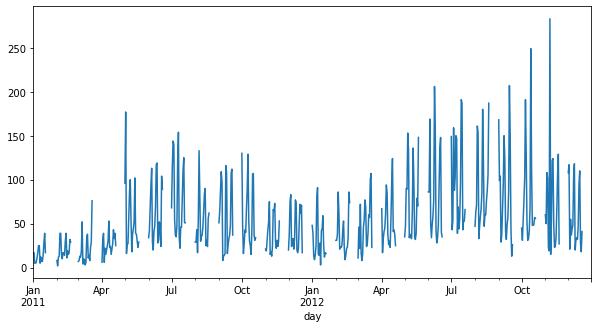

In [238]:
mdf['count'].plot(figsize=(10,5))

In [239]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['count'],model='multiplicative')

ValueError: ignored

##1)Basic statistics

In [ ]:
df.info() 

In [ ]:
test_df.info() 

##2)Basic feature engineering


In [ ]:
df.drop(['holiday','casual','registered'],axis=1,inplace=True) 

#2.Preprocessing

##2)Scaling

In [ ]:
df.describe() 

In [ ]:
fig=plt.figure(figsize=(10,30)) 
for x,feature in enumerate(df.columns):
  fig.add_subplot(11,1,x+1)
  sns.histplot(data=df,x=feature)
fig.tight_layout()

In [ ]:
df['count']=np.log1p(df['count'])
df['windspeed']=np.log1p(df['windspeed'])

##3)Feature selection

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [ ]:
df.drop('atemp',axis=1,inplace=True)

#3.Modeling

In [ ]:
train_df=df.loc[df['count'].isna()==False] 
test_df=df.loc[df['count'].isna()==True]
target_df=train_df['count']
feature_df=train_df.drop('count',axis=1)
test_df.info()

In [ ]:
def get_eval(real,pred): 
  squared_error=(np.log1p(real)-np.log1p(pred))**2
  rmsle=np.sqrt(np.mean(squared_error))
  rmse=np.sqrt(mean_squared_error(real,pred)
  mae=mean_absolute_error(real,pred)
  print('RMSLE:{0:.4f} / RMSE:{1:.4f} / MAE:{2:.4f}'.format(rmsle,rmse,mae))

#1)Feedback 
Time variable is different from all others